# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data.

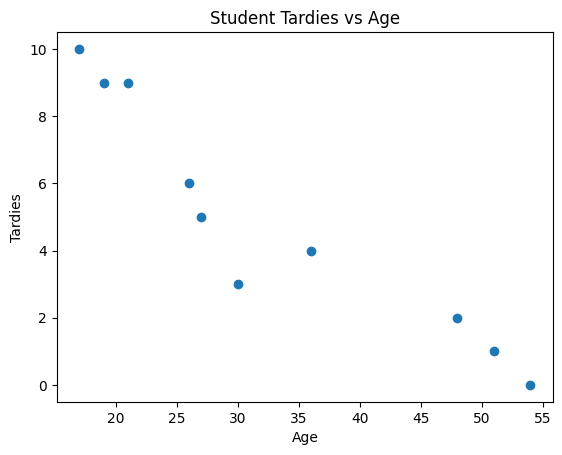

In [2]:
import matplotlib.pyplot as plt

data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Student Tardies vs Age')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
#Conforme a idade aumenta o numero dos atrasos diminui....


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [8]:
# Your response here.
#correlation:
correlation = student_data['Age'].corr(student_data['Tardies'])

#covariance:
covariance = student_data['Age'].cov(student_data['Tardies'])

print (covariance)
print (correlation)

-45.56666666666666
-0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [10]:
from sklearn.linear_model import LinearRegression

data = {
    'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
}

student_data = pd.DataFrame(data)
X = student_data[['Age']]
y = student_data['Tardies']

model = LinearRegression()

model.fit(X, y)

print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

Coefficient: -0.2428207709159809
Intercept: 12.888803363135771


Plot your regression model on your scatter plot.

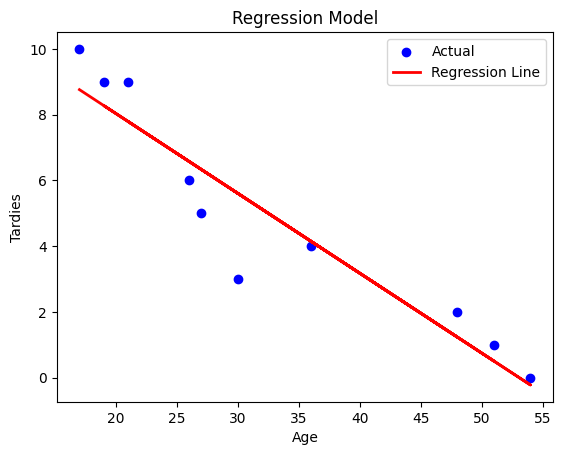

In [12]:
y_pred = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')

plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Regression Model')

plt.legend()

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [18]:
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)


Coefficient: -0.2428207709159809
Intercept: 12.888803363135771


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
import pandas as pd
df = pd.read_csv('vehicles.csv')

print(df.head())

print(df.info())


               Make                Model  Year  Engine Displacement   
0        AM General    DJ Po Vehicle 2WD  1984                  2.5  \
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class   
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD  \
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG   
0   Regular          

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df_selected = df[variables]

correlations = df_selected.corr()
print(correlations)


                             Year  Cylinders  Fuel Barrels/Year  Combined MPG   
Year                     1.000000   0.082469          -0.221084      0.204751  \
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
X = df_selected.drop('CO2 Emission Grams/Mile', axis=1)
y = df_selected['CO2 Emission Grams/Mile']

model = LinearRegression()

model.fit(X, y)


LinearRegression()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [28]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
df_selected = df[variables]

X = df_selected.drop('CO2 Emission Grams/Mile', axis=1)
y = df_selected['CO2 Emission Grams/Mile']

model = LinearRegression()

model.fit(X, y)

coefficients = dict(zip(X.columns, model.coef_))
for variable, coefficient in coefficients.items():
    print(f'{variable}: {coefficient}')

Year: -0.3206167315187467
Cylinders: 1.8787997557940224
Fuel Barrels/Year: 19.05292506503162
Combined MPG: -3.0403993802127935
Fuel Cost/Year: 0.03230947894138491


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

c:\Users\Leticia Demarchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


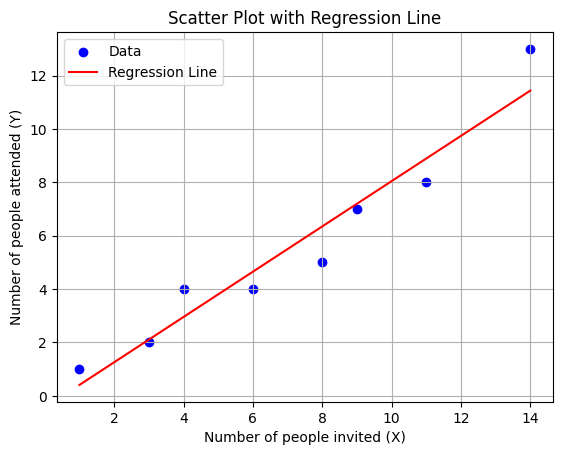

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create the dataframe with the data
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}
df = pd.DataFrame(data)

X = df[['X']]
Y = df['Y']

model = LinearRegression()
model.fit(X, Y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
Y_pred = model.predict(X_pred)

plt.scatter(X, Y, color='b', label='Data')
plt.plot(X_pred, Y_pred, color='r', label='Regression Line')
plt.xlabel('Number of people invited (X)')
plt.ylabel('Number of people attended (Y)')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [31]:
print('Regression Results:')
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')


Regression Results:
Intercept: -0.43939393939393945
Coefficient: [0.84848485]


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

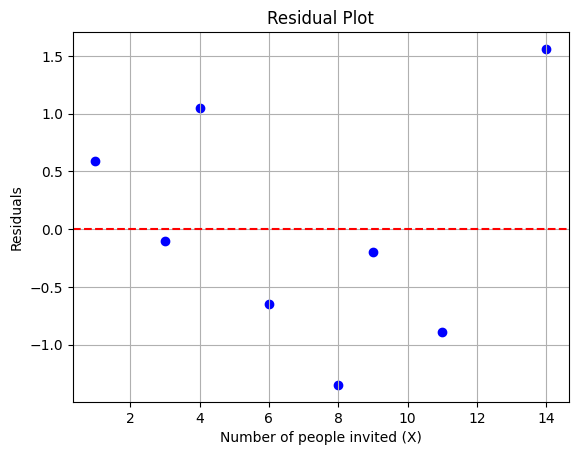

In [32]:
residuals = Y - model.predict(X)

plt.scatter(X, residuals, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Number of people invited (X)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [33]:
#ficou muito mal haha
